In [58]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json

# Primo loopback

In [2]:
powertest=pd.read_csv('../output/powersTest.csv')

In [4]:
groups=powertest.groupID

In [7]:
selectionTest=gpd.read_file('../output/selectionTest.shp')

<AxesSubplot:>

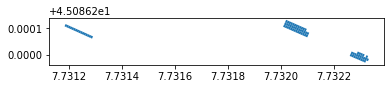

In [68]:
selectionTest.head(80).plot()

In [19]:
roofIDS=selectionTest[selectionTest.group.isin(groups)].roofID.unique()

In [11]:
areasuit=gpd.read_file('../input/areasuit1kW.shp')

In [20]:
areasuit.head()

FID      slope    num  Area_reale  Number      S    angle  OBJECTID_1  \
0  14593  18.355854   80.0   21.072175      12  20.70   90.000      4497.0   
1  14822  36.091292   37.0   11.446895       6  10.35  101.674      4497.0   
2  14870  27.302117   26.0    7.314875       4   6.90   98.230      4497.0   
3  15095  14.037548   44.0   11.338605       6  10.35  109.880      4497.0   
4  93891  26.188804  322.0   89.709124      52  89.70  106.134      4497.0   

  OBJECTID  COD_ISTAT  ...  AREA_KM2  \
0     None  1001272.0  ...  0.008036   
1     None  1001272.0  ...  0.008036   
2     None  1001272.0  ...  0.008036   
3     None  1001272.0  ...  0.008036   
4     None  1001272.0  ...  0.008036   

                                          NOME_AREA_  NOME_ENTIT     P1  \
0  Regio Parco, Barca, Bertolla, Barriera di Mila...      Torino  182.0   
1  Regio Parco, Barca, Bertolla, Barriera di Mila...      Torino  182.0   
2  Regio Parco, Barca, Bertolla, Barriera di Mila...      Torino  182.0   
3  Regio Parco, Barca, Bertolla, Barriera di Mila...      Torino  182.0   
4  Regio Parco, Barca, Bertolla, Barriera di Mila...      Torino  182.0   

    SHAPE.AREA   SHAPE.LEN      DENSITA    roofArea AreaVSDens  \
0  8035.571201  362.536988  22649.29557  376.067842      0.017   
1  8035.571201  362.536988  22649.29557  376.067842      0.017   
2  8035.571201  362.536988  22649.29557  376.067842      0.017   
3  8035.571201  362.536988  22649.29557  376.067842      0.017   
4  8035.571201  362.536988  22649.29557  376.067842      0.017   

                                            geometry  
0  POLYGON ((7.68912 45.09496, 7.68909 45.09496, ...  
1  POLYGON ((7.68972 45.09473, 7.68971 45.09473, ...  
2  POLYGON ((7.68900 45.09469, 7.68898 45.09469, ...  
3  POLYGON ((7.68891 45.09441, 7.68889 45.09441, ...  
4  POLYGON ((7.68957 45.09492, 7.68950 45.09494, ...  

[5 rows x 26 columns]

In [22]:
sections=areasuit[areasuit.FID.isin(roofIDS)].SEZ2011.unique()

In [26]:
pd.DataFrame({'sections':sections}).to_csv('../output/secToSim.csv')

# Secondo Loopback

In [84]:
temp=pd.read_csv('../output/powersTest.csv')

In [85]:
temp.head()

Unnamed: 0  groupID                                                  P
0           0        2  [68.19, 68.19, 68.19, 68.19, 68.19, 68.19, 68....
1           1        3  [113.65, 113.65, 113.65, 113.65, 113.65, 113.6...
2           2        4  [272.76, 272.76, 272.76, 272.76, 272.76, 272.7...
3           3        5  [250.03, 250.03, 250.03, 250.03, 250.03, 250.0...
4           4        6  [68.19, 68.19, 68.19, 68.19, 68.19, 68.19, 68....

In [86]:
selectedSections=gpd.read_file('../output/selectedSec.shp')

In [87]:
selectedSections['production']=np.nan

In [88]:
selectedSections.head()

OBJECTID_1  OBJECTID  COD_ISTAT  PRO_COM       SEZ2011     SEZ  COD_ASC  \
0     26857.0         0  1001272.0   1272.0  1.272000e+10  2132.0      2.0   
1     30115.0         0  1001272.0   1272.0  1.272000e+10    64.0      1.0   
2     27818.0         0  1001272.0   1272.0  1.272000e+10  3153.0      1.0   
3     28401.0         0  1001272.0   1272.0  1.272000e+10  2930.0      9.0   
4     28977.0         0  1001272.0   1272.0  1.272000e+10  2410.0      4.0   

    ACE  PERIM_KM  AREA_KM2                              NOME_AREA_  \
0  26.0       1.0  0.015685              Santa Rita, Mirafiori nord   
1  18.0       1.0  0.054145                        Centro, Crocetta   
2  15.0       0.0  0.010859                        Centro, Crocetta   
3  83.0       1.0  0.015342  Nizza Millefonti, Lingotto, Filadelfia   
4  40.0       4.0  0.387366        San Donato, Parella, Campidoglio   

  NOME_ENTIT     P1     SHAPE.AREA    SHAPE.LEN     DENSITA     roofArea  \
0     Torino    4.0   15685.083786   527.668096   255.01942   761.815487   
1     Torino   94.0   54145.053360  1310.607203  1736.07744  5146.354485   
2     Torino    4.0   10858.822560   417.424307   368.36415  1089.147044   
3     Torino    2.0   15342.485081   506.833682   130.35694   380.008734   
4     Torino  598.0  387366.210921  3813.610647  1543.75877  4413.144055   

   AreaVSDens                                           geometry  production  
0       2.987  POLYGON ((7.64851 45.04601, 7.64800 45.04526, ...         NaN  
1       2.964  POLYGON ((7.68698 45.07562, 7.68688 45.07547, ...         NaN  
2       2.957  POLYGON ((7.66806 45.07181, 7.66915 45.07142, ...         NaN  
3       2.915  POLYGON ((7.66748 45.02742, 7.66927 45.02691, ...         NaN  
4       2.859  POLYGON ((7.62603 45.08684, 7.62595 45.08668, ...         NaN

In [122]:
production=[]
for i,r in selectedSections.iterrows():
    rids=areasuit[areasuit.SEZ2011==r.SEZ2011].FID.values
    ps=None
    for rid in rids:
        g=selectionTest[selectionTest.roofID==rid].group.unique()
        if len(g)!=0:
            for x in g:
                p=np.array([float(v) for v in json.loads(temp[temp.groupID==x].P.values[0])])
                if ps is None:
                    ps=p
                else:
                    ps+=p
    if ps is None:
        ps=[0]
    production.append(sum(ps))
                
                
    
        
        
        

In [124]:
selectedSections['production']=production

In [125]:
selectedSections.to_file('../output/final.shp')